In [1]:
!pip install deepface
from deepface import DeepFace
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image
import glob

     |████████████████████████████████| 63 kB 1.9 MB/s 
     |████████████████████████████████| 2.3 MB 14.0 MB/s 
     |████████████████████████████████| 462 kB 44.1 MB/s 
Directory  /root /.deepface created
Directory  /root /.deepface/weights created


# Load Images

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
img_path = 'drive/MyDrive/Colab Notebooks/Tugas Kelompok 2/DatasetFoto/'
#Training Image
img_path_anggota = os.path.join(img_path, 'AnggotaKelas')
#image_list_anggota = []
image_name_list_anggota = []
for filename in glob.glob(img_path_anggota + '/*.jpg') + glob.glob(img_path_anggota + '/*.jpeg') + glob.glob(img_path_anggota + '/*.png') + glob.glob(img_path_anggota + '/*.jfif'):
    im=Image.open(filename)
    #image_list_anggota.append(im)
    image_name_list_anggota.append(im.filename)


#Test Image
img_path_non_anggota = os.path.join(img_path, 'NonAnggotaKelas')
assert os.path.isdir(img_path_non_anggota), print(f'Could not find {img_path_non_anggota}')
#image_list_non_anggota = []
image_name_list_non_anggota = []
for filename in glob.glob(img_path_non_anggota + '/*.jpg') + glob.glob(img_path_non_anggota + '/*.jpeg') + glob.glob(img_path_non_anggota + '/*.png') + glob.glob(img_path_non_anggota + '/*.jfif'):
    im=Image.open(filename)
    #image_list_non_anggota.append(im)
    image_name_list_non_anggota.append(im.filename)


# Show some anggota images

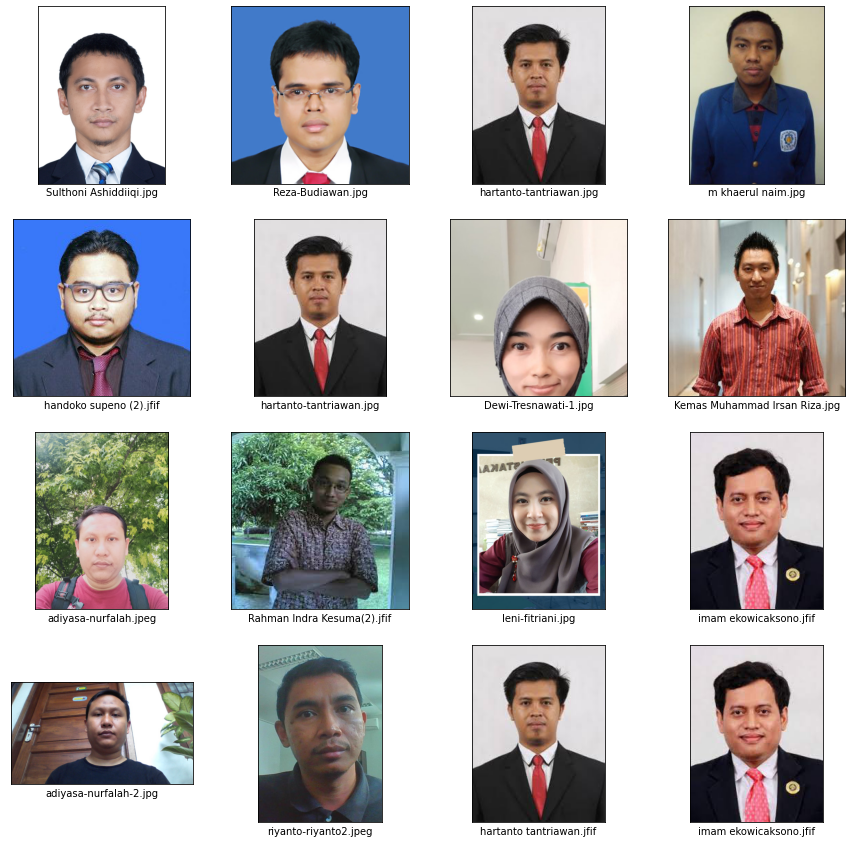

In [9]:
plt.figure(figsize=(15,15))
random_inds = np.random.choice(len(image_name_list_anggota),16)
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image_ind = random_inds[i]
    plt.imshow(np.squeeze(plt.imread(image_name_list_anggota[image_ind])), cmap=plt.cm.binary)
    plt.xlabel(os.path.basename(image_name_list_anggota[image_ind]))

# Show some non anggota images

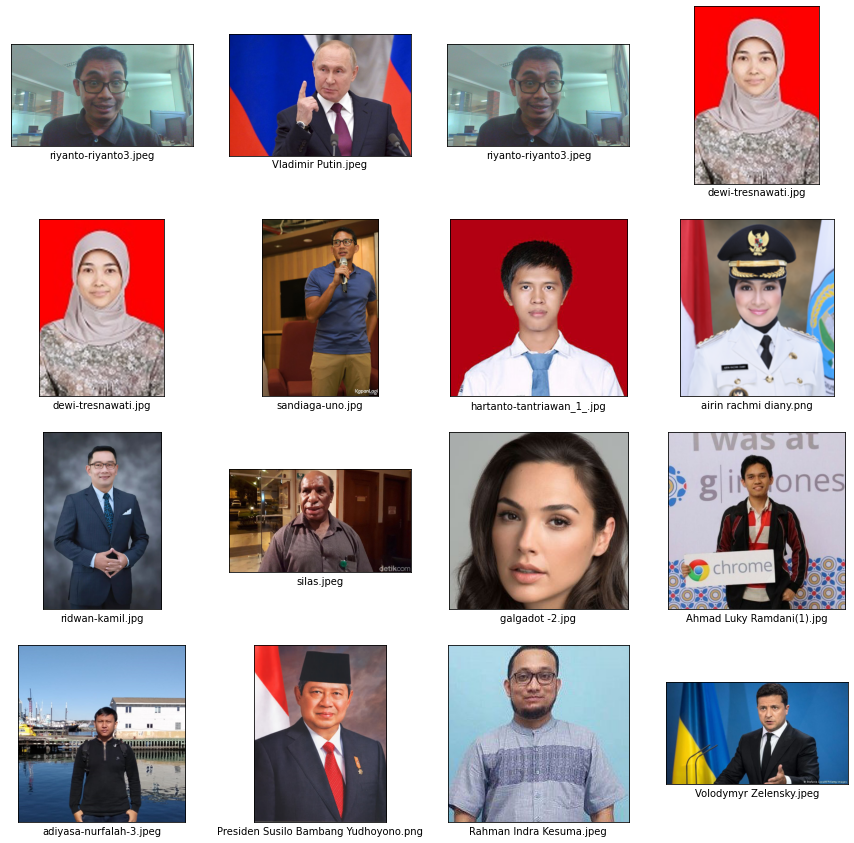

In [8]:
#show some Test pictures
plt.figure(figsize=(15,15))
random_inds = np.random.choice(len(image_name_list_non_anggota),16)
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image_ind = random_inds[i]
    plt.imshow(np.squeeze(plt.imread(image_name_list_non_anggota[image_ind])), cmap=plt.cm.binary)
    plt.xlabel(os.path.basename(image_name_list_non_anggota[image_ind]))

# Find similar face

In [30]:
result = [] 
plt.figure(figsize=(15,15))
for i in range(len(image_name_list_non_anggota)):
  df = DeepFace.find(img_path = image_name_list_non_anggota[i], db_path = img_path_anggota, enforce_detection=False)
  print('index-',i)
  if df.shape[0] > 0:
    matched = df.iloc[0].identity
    #result.append([image_name_list_non_anggota[i],matched,os.path.basename(image_name_list_non_anggota[i]) + ' match with ' + os.path.basename(matched)])
    result.append(os.path.basename(image_name_list_non_anggota[i]) + ' match with ' + os.path.basename(matched))
  else:
    result.append(os.path.basename(image_name_list_non_anggota[i]) + ' <Unknown> ')
    #result.append([image_name_list_non_anggota[i],'',os.path.basename(image_name_list_non_anggota[i]) + ' <Unknown> '])


There are  25  representations found in  representations_vgg_face.pkl
find function lasts  1.5496032238006592  seconds
index- 0
There are  25  representations found in  representations_vgg_face.pkl
find function lasts  1.0407919883728027  seconds
index- 1
There are  25  representations found in  representations_vgg_face.pkl
find function lasts  1.2067039012908936  seconds
index- 2
There are  25  representations found in  representations_vgg_face.pkl
find function lasts  0.7641277313232422  seconds
index- 3
There are  25  representations found in  representations_vgg_face.pkl
find function lasts  0.726654052734375  seconds
index- 4
There are  25  representations found in  representations_vgg_face.pkl
find function lasts  0.7044119834899902  seconds
index- 5
There are  25  representations found in  representations_vgg_face.pkl
find function lasts  0.9296541213989258  seconds
index- 6
There are  25  representations found in  representations_vgg_face.pkl
find function lasts  0.770362854003

<Figure size 1080x1080 with 0 Axes>

# Show the result

In [31]:
plt.figure(figsize=(15,250))
for i in range(len(image_name_list_non_anggota)):
    plt.subplot(len(image_name_list_non_anggota),2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(np.squeeze(plt.imread(image_name_list_non_anggota[i])), cmap=plt.cm.binary)
    plt.xlabel(result[i])

Output hidden; open in https://colab.research.google.com to view.